In [1]:
# 10/16/2020
# This notebook demonstrates how to save run parameters and results from CFL

In [2]:
# imports
import cfl
from cfl.cfl_wrapper import make_CFL
from cfl.save.experiment_saver import ExperimentSaver
from cfl.dataset import Dataset
import numpy as np
import joblib
import matplotlib.pyplot as plt
import tensorflow as tf

X shape: (13140, 495)
Y shape: (13140, 495)


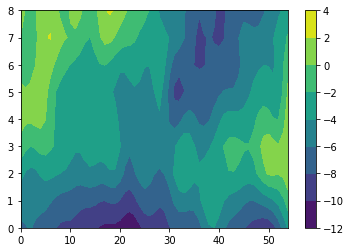

In [3]:
# load data
X, Y, coords = joblib.load('cfl_examples/el_nino/elnino_data.pkl')
imshape = (55, 9)
print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(Y.shape))

# plot an example image
plt.contourf(X[0].reshape(imshape).T)
plt.colorbar()
plt.show()

In [4]:
# save experiment results from this CFL configuration across all datasets to 'results/el_nino/experiment000x'
experiment_saver = ExperimentSaver('results/el_nino')

# construct dataset. this will save all dataset-specific results to 'results/el_nino/experiment000x/dataset0'
dataset0 = Dataset(X, Y, dataset_label='dataset0', experiment_saver=experiment_saver)

All results from this run will be saved to results/el_nino/experiment0010


In [5]:
# set all CFL parameters

# generic data parameters
data_info = { 'X_dims' : X.shape, 
              'Y_dims' : Y.shape } 

# CDE parameters
lr = 1e-4
CDE_params = { 'batch_size'  : 128,
               'optimizer'   : 'adam',
               'n_epochs'    : 3,
               'verbose'     : True,
               'dense_units' : [1024, 1024, data_info['Y_dims'][1]],
               'activations' : ['linear', 'linear', 'linear'],
               'dropouts'    : [0.2, 0.5, 0.5],
}
# clusterer parameters
cluster_params = { 'n_Xclusters' : 4, 
                   'n_Yclusters' : 4 }

In [6]:
# build CFL object! 
cfl_object = make_CFL(  data_info=data_info, 
                        CDE_type='CondExpMod', 
                        cluster_type='Kmeans', 
                        CDE_params=CDE_params, 
                        cluster_params=cluster_params,
                        experiment_saver=experiment_saver) 

opt_config not specified in params, defaulting to {}
weights_path not specified in params, defaulting to None
loss not specified in params, defaulting to mean_squared_error


Train on 9855 samples, validate on 3285 samples
Epoch 1/3
9855/9855 [==============================] - 12s 1ms/sample - loss: 1.2886 - val_loss: 0.6291
Epoch 2/3
9855/9855 [==============================] - 9s 925us/sample - loss: 0.8339 - val_loss: 0.5837
Epoch 3/3
9855/9855 [==============================] - 10s 1ms/sample - loss: 0.7924 - val_loss: 0.5979


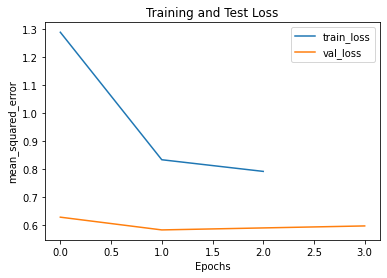

100%|██████████| 13140/13140 [06:14<00:00, 35.13it/s]


In [7]:
train_results = cfl_object.train(dataset0, standardize=True)

In [8]:
# make second dataset for prediction
dataset1 = Dataset(X[:100,:], Y[:100,:], dataset_label='dataset1', experiment_saver=experiment_saver) 
# note: drawing from the same data as dataset0 for now for sake of demonstration

In [9]:
pyx = cfl_object.predict(dataset1)

100%|██████████| 100/100 [00:00<00:00, 2469.58it/s]


In [10]:
from cfl.visualization_methods.visualization import visualize

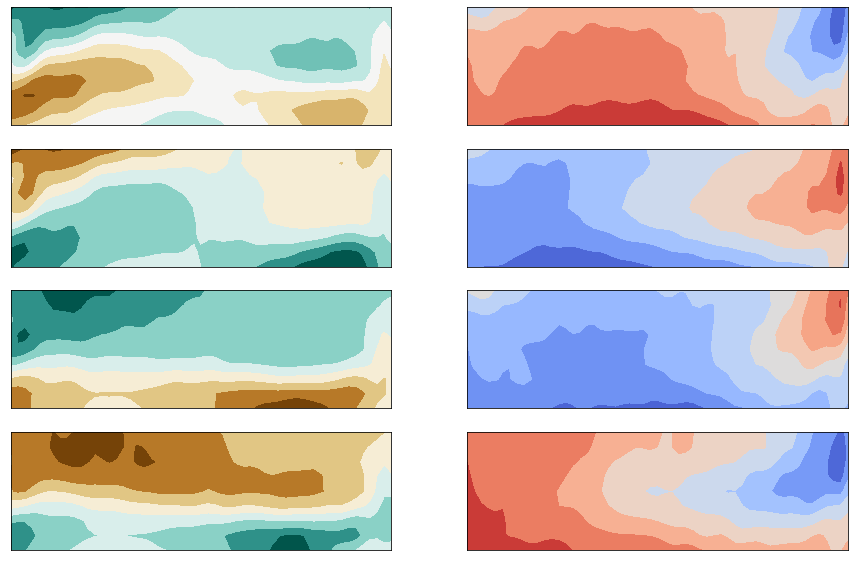

In [11]:
FIG_KWARGS = {'figsize' : (15,10), 'facecolor' : 'white'} #NOTE: these values are el nino-specific 
X_KWARGS = { 'cmap' : 'BrBG_r' }
Y_KWARGS = {'cmap' : 'coolwarm' }
visualize(X, Y, x_lbls=train_results[0], y_lbls=train_results[1], fig_kwargs=FIG_KWARGS, X_kwargs=X_KWARGS, Y_kwargs=Y_KWARGS)